<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

###  InstitutoTecnológico y de Estudios Superiores de Occidente ###
###  Maestría Ciencia de Datos  ###
###  Modelado Predictivo ###
# Tarea 2: PCA vs LDA #

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Dr. Riemann Ruiz Cruz <br>
Fecha entrega: 14 de septiembre 2022<br>

* * *

<br>
<br>

## Introduction

In this exercise, the dataset that will be used is the well-known “digits” dataset, which is already included in the sklearn library [(sklearn.datasets.load_digits — scikit-learn 1.1.2 documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). This dataset is used to test classification models because the output variable contains ten valid classes which correspond to each digit between 0 and 9. The dataset is a copy of the test set of the UCI ML hand-written digits datasets :

[https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

*We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.*

- *All input attributes are integers in the range 0..16.*
- *The last attribute is the class code 0..9*


Using the data set mentioned, develop the following points:
1. Create two subsets of data, where the first one will be used for the training process and the second one for the testing process. It is important that the same data subsets are used for all subsequent models.
2. Train a logistic regression model to estimate the feature “target” using all the pixels in the image as input variables. Get the accuracy values or another metric (precision, recall, …) to evaluate the model's performance in training and testing.
3. Considering the data set obtained in point 1, perform the dimension reduction using the PCA method. With the variables resulting from the reduction process, train a new logistic regression model and calculate the same metrics used in point 2.
4. Considering the data set used in point 1 again, perform a variable reduction by LDA transformation. With the variables resulting from the transformation process, train a new logistic regression wich must be evaluated with the same metrics as the previous models.
5. Considering the data set used in point 1 again; train a LDA model and evaluate the model with the same metrics.
6. As a result of the previous steps, we have four different models to solve the problem proposed. Make a table with the metrics of each model to make a comparison of the models.

## Development

### Create two subsets of data, where the first one will be used for the training process and the second one for the testing process. It is important that the same data subsets are used for all subsequent models.

In [89]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_digits(return_X_y = True)
print(X.shape)
print(y.shape)


(1797, 64)
(1797,)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Train a logistic regression model to estimate the feature “target” using all the pixels in the image as input variables. Get the accuracy values or another metric (precision, recall, …) to evaluate the model's performance in training and testing.

Using the LogisticRgression function from sklear.

> *In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.*

> *If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.*

In [91]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'sag', multi_class='ovr').fit(X_train, y_train)
print("training score : %.3f (%s)" % (clf.score(X_train, y_train), 'ovr'))
print("test score : %.3f (%s)" % (clf.score(X_test, y_test), 'ovr'))

c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

training score : 0.991 (ovr)
test score : 0.970 (ovr)


### Considering the data set obtained in point 1, perform the dimension reduction using the PCA method. With the variables resulting from the reduction process, train a new logistic regression model and calculate the same metrics used in point 2.

[0.14411041 0.27974295 0.39907761 0.48504358 0.54453354 0.59340297
 0.63754404 0.6738149  0.70782563 0.73826034 0.76207807 0.78428237
 0.80300624 0.82092233 0.83614756 0.85024667 0.86336471 0.8755268
 0.88552272 0.89486969 0.90397009 0.91188756 0.91945312 0.92653139
 0.93342653 0.93923663 0.94485927 0.94998684 0.95493708 0.95929918
 0.96303541 0.9664767  0.9698009  0.97300449 0.97600818 0.97894754
 0.98159697 0.98390353 0.9861197  0.98816846 0.99004884 0.99162734
 0.99313858 0.99462228 0.99580284 0.99689066 0.99783568 0.99864156
 0.99920862 0.99957922 0.99975784 0.99984919 0.99989926 0.99994486
 0.99998205 0.9999934  0.99999776 0.9999989  0.99999964 1.
 1.         1.         1.         1.        ]


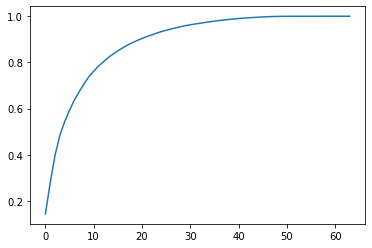

In [92]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca = pca.fit(X_train)
pca.explained_variance_ratio_
print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(64), np.cumsum(pca.explained_variance_ratio_))

It looks like the 10 to 30 principal components will represent the majority of variance from the input data. More than that the change is marginal.

In [93]:
X_pca_train = pca.transform(X_train)
X_pca_train = X_pca_train[:, :30]
X_pca_test = pca.transform(X_test)
X_pca_test = X_pca_test[:, :30]

In [94]:

clf_pca = LogisticRegression(solver = 'sag', multi_class='ovr').fit(X_pca_train, y_train)
print("training score PCA: %.3f " % (clf_pca.score(X_pca_train, y_train)))
print("test score PCA: %.3f " % (clf_pca.score(X_pca_test, y_test)))

c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

training score PCA: 0.974 
test score PCA: 0.970 


c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Considering the data set used in point 1 again, perform a variable reduction by LDA transformation. With the variables resulting from the transformation process, train a new logistic regression wich must be evaluated with the same metrics as the previous models.

[0.26660995 0.45236365 0.63080783 0.75623888 0.84302717 0.91165359
 0.95098847 0.97997637 1.        ]


Text(0, 0.5, '% explained variance')

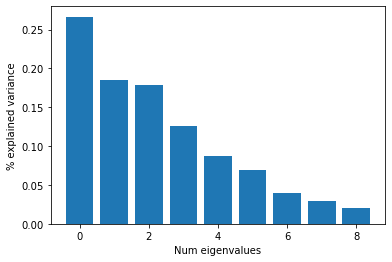

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model = lda_model.fit(X_train, y_train)

print(np.cumsum(lda_model.explained_variance_ratio_))
plt.bar(np.arange(len(lda_model.explained_variance_ratio_)),lda_model.explained_variance_ratio_)
plt.xlabel('Num eigenvalues')
plt.ylabel('% explained variance')


In [96]:
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)

In [97]:
clf_lda = LogisticRegression(solver = 'sag', multi_class='ovr').fit(X_lda_train, y_train)
print("training score LDA Log: %.3f " % (clf_lda.score(X_lda_train, y_train)))
print("test score LDA Log: %.3f " % (clf_lda.score(X_lda_test, y_test)))

c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nuno\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

training score LDA Log: 0.967 
test score LDA Log: 0.963 


### Considering the data set used in point 1 again; train a LDA model and evaluate the model with the same metrics.

In [98]:
print("training score LDA: %.3f " % (lda_model.score(X_train, y_train)))
print("test score LDA: %.3f " % (lda_model.score(X_test, y_test)))

training score LDA: 0.961 
test score LDA: 0.963 


### As a result of the previous steps, we have four different models to solve the problem proposed. Make a table with the metrics of each model to make a comparison of the models.

In [99]:
import pandas as pd
results = {'Model': ["Original Log", "PCA Log", "LDA Log", "LDA"],
           'Score Train': [clf.score(X_train, y_train), clf_pca.score(X_pca_train, y_train), clf_lda.score(X_lda_train, y_train), lda_model.score(X_train, y_train)],
           'Score Test': [clf.score(X_test, y_test), clf_pca.score(X_pca_test, y_test), clf_lda.score(X_lda_test, y_test), lda_model.score(X_test, y_test)]}

results = pd.DataFrame(data=results)
results

,Model,Score Train,Score Test
0,Original Log,0.991249,0.970370
1,PCA Log,0.973747,0.970370
2,LDA Log,0.966587,0.962963
3,LDA,0.961018,0.962963


## Conclusions

The original model has the best performance within trainning dataset. However, using pca and lda the acurracy is still pretty close in the test dataset and the difference between train and test scores are closer. Like not less overtrained.